# CV

In [1]:
!pip install face-recognition

     |████████████████████████████████| 100.2MB 38kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=5bec6ffc816e03b74b9c440d98960c553c911cfb257b7e4f1008e28e245f8547
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
import face_recognition
import cv2
import numpy as np

import matplotlib.pyplot as plt

--2021-05-25 13:48:31--  https://upload.wikimedia.org/wikipedia/commons/6/6e/Solvay_conference_1927.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2671814 (2.5M) [image/jpeg]
Saving to: ‘Solvay_conference_1927.jpg’

Solvay_conference_1 100%[===================>]   2.55M  --.-KB/s    in 0.1s    

2021-05-25 13:48:31 (26.3 MB/s) - ‘Solvay_conference_1927.jpg’ saved [2671814/2671814]



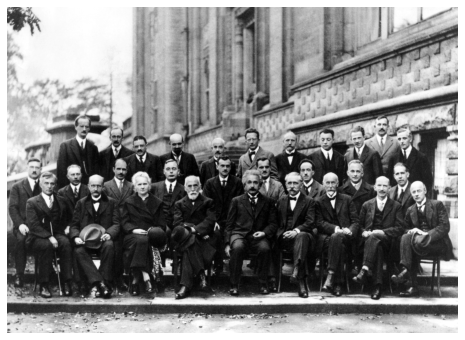

In [3]:
!wget -N https://upload.wikimedia.org/wikipedia/commons/6/6e/Solvay_conference_1927.jpg
fn = "Solvay_conference_1927.jpg"

image = cv2.imread(fn, flags=cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(9, 6))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
face_landmarks_list = face_recognition.face_landmarks(image)
print("Found %i faces in the image" % len(face_landmarks_list))

Found 29 faces in the image


In [6]:
face_landmarks_list[0].keys()

dict_keys(['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge', 'nose_tip', 'left_eye', 'right_eye', 'top_lip', 'bottom_lip'])

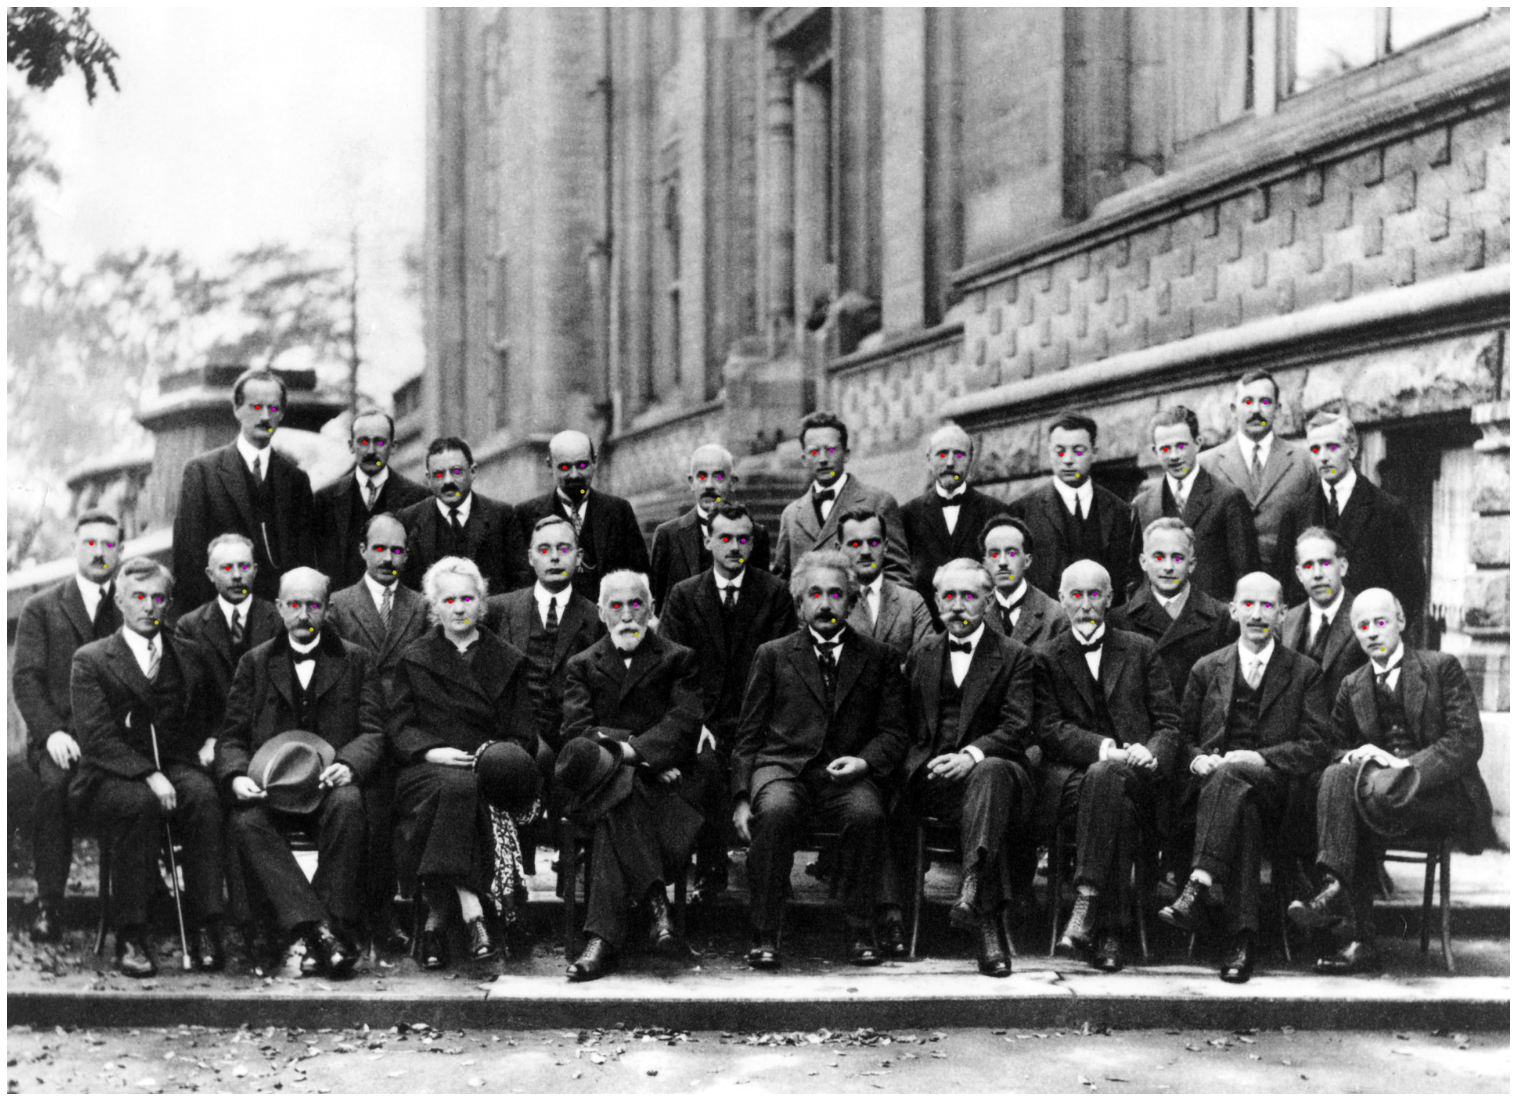

In [19]:
plt.figure(figsize=(30, 20))
plt.imshow(image, cmap='gray')
for face_landmarks in face_landmarks_list:
  left_eye = np.asarray(np.mean(np.vstack([np.hstack(coord) for coord in face_landmarks['left_eye']]), axis=0), dtype=np.int)
  right_eye = np.asarray(np.mean(np.vstack([np.hstack(coord) for coord in face_landmarks['right_eye']]), axis=0), dtype=np.int)
  mouth = np.asarray(np.max(np.vstack([np.hstack(coord) for coord in face_landmarks['bottom_lip']]), axis=0), dtype=np.int)
  plt.scatter(left_eye[0], left_eye[1], s=10, c='r')
  plt.scatter(right_eye[0], right_eye[1], s=10, c='m')
  plt.scatter(mouth[0], mouth[1], s=10, c='y')
plt.axis('off')
plt.show()


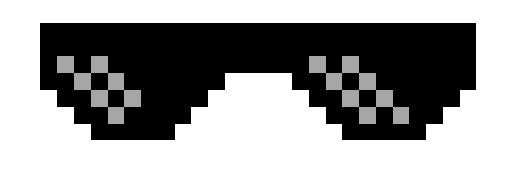

(10, 30, 4)

In [8]:
# !wget -N https://upload.wikimedia.org/wikipedia/commons/6/6e/Solvay_conference_1927.jpg
fn = "Thug_life_glasses.png"

glasses = cv2.imread(fn, flags=cv2.IMREAD_UNCHANGED)
plt.figure(figsize=(9, 6))
plt.imshow(glasses, cmap='gray')
plt.axis('off')
plt.show()

glasses.shape

In [10]:
scale = (right_eye[0]-left_eye[0])/15
scale

2.6

(26, 78, 4)

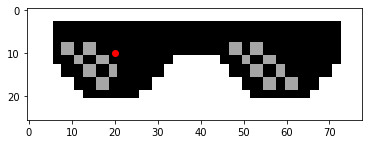

In [17]:
# rotation = np.arctan2(right_eye[1]-left_eye[1], right_eye[0]-left_eye[0])
glasses_scaled = cv2.resize(glasses, (int(glasses.shape[1]*scale), int(glasses.shape[0]*scale)), interpolation=cv2.INTER_NEAREST)
c_orig = np.asarray([8, 4], dtype=np.int) # x, y
c_scaled = np.asarray(c_orig*scale, dtype=np.int)

# scale, rotation
plt.imshow(glasses_scaled)
plt.scatter(c_scaled[0], c_scaled[1], c='r')
glasses_scaled.shape

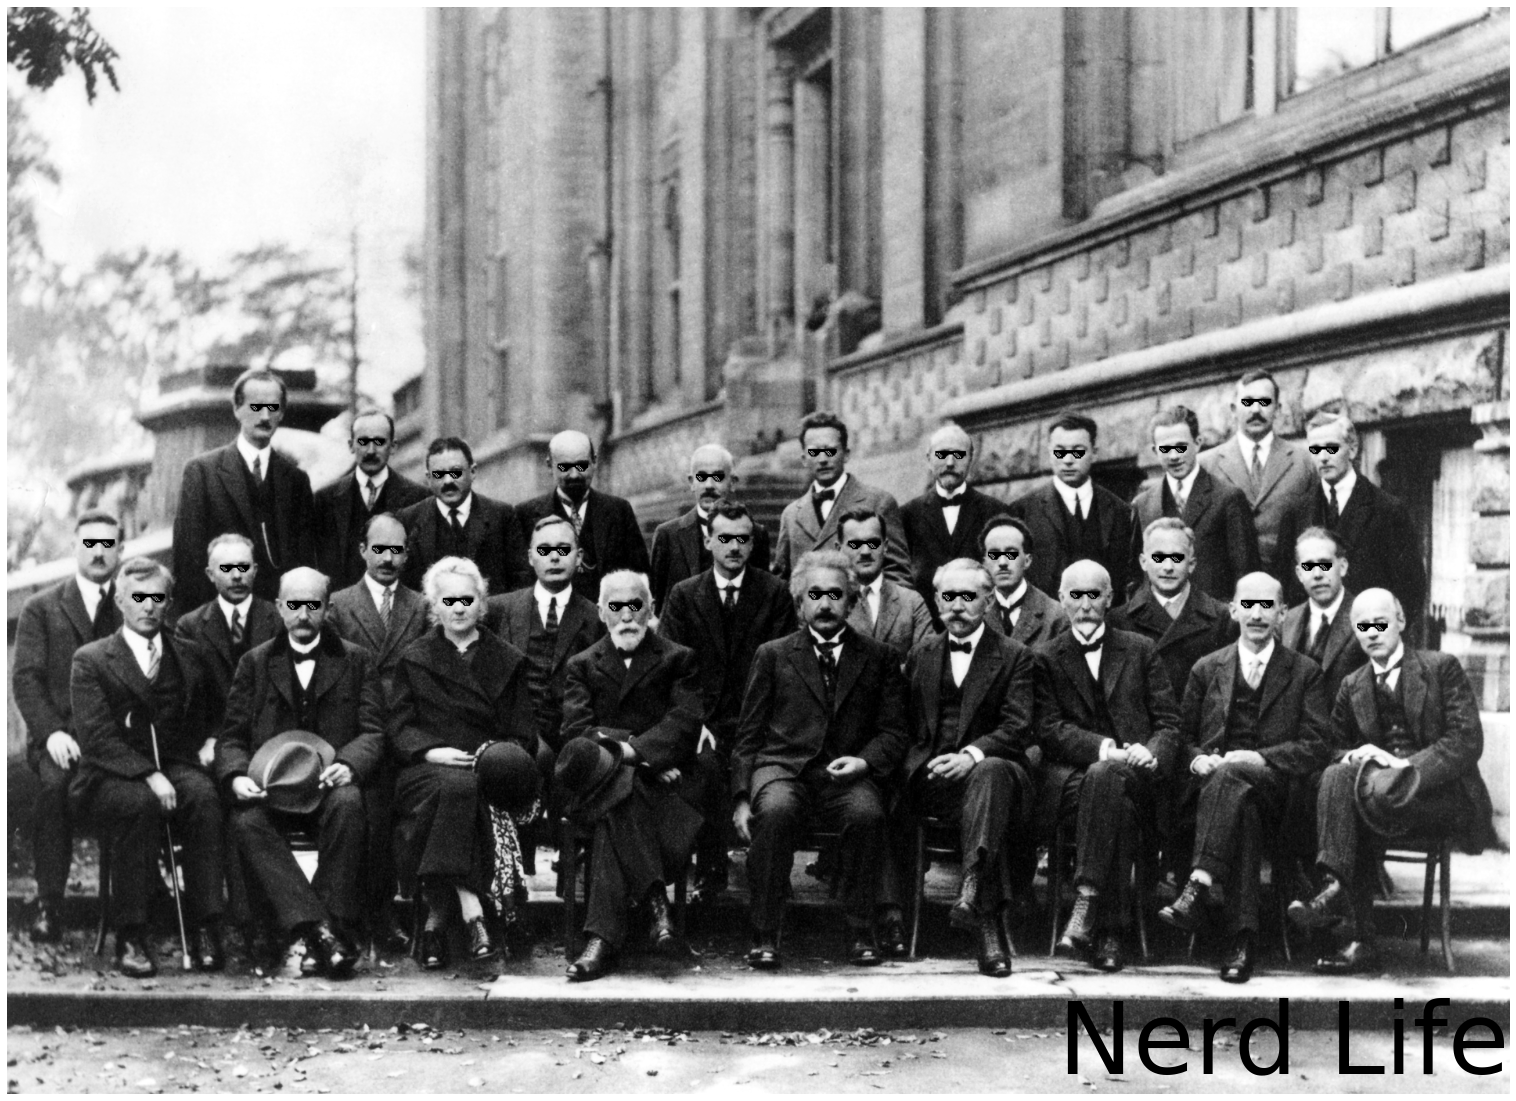

In [18]:
plt.figure(figsize=(30, 20))
img = image.copy()
for face_landmarks in face_landmarks_list:
  left_eye = np.asarray(np.mean(np.vstack([np.hstack(coord) for coord in face_landmarks['left_eye']]), axis=0), dtype=np.int)
  right_eye = np.asarray(np.mean(np.vstack([np.hstack(coord) for coord in face_landmarks['right_eye']]), axis=0), dtype=np.int)
  scale = (right_eye[0]-left_eye[0])/15
  # rotation = np.arctan2(right_eye[1]-left_eye[1], right_eye[0]-left_eye[0])
  glasses_scaled = cv2.resize(glasses, (int(glasses.shape[1]*scale), int(glasses.shape[0]*scale)), interpolation=cv2.INTER_NEAREST)
  c_orig = np.asarray([8, 4], dtype=np.int) # x, y
  c_scaled = np.asarray(c_orig*scale, dtype=np.int)
  bbx = [left_eye[0]-c_scaled[0], 0, left_eye[1]-c_scaled[1], 0] # x1, x2, y1, y2
  bbx[1] = bbx[0] + glasses_scaled.shape[1]
  bbx[3] = bbx[2] + glasses_scaled.shape[0]
  orig = img[bbx[2]:bbx[3], bbx[0]:bbx[1]]
  glasses_gray = cv2.cvtColor(glasses_scaled, cv2.COLOR_BGR2GRAY)
  orig[glasses_scaled[:, :, 3]==255] = glasses_gray[glasses_scaled[:, :, 3]==255]
  img[bbx[2]:bbx[3], bbx[0]:bbx[1]] = orig
plt.imshow(img, cmap='gray')
a = plt.axis()
plt.text(a[1], a[2], "Nerd Life", horizontalalignment='right', verticalalignment='bottom', fontsize=100)
plt.axis('off')
plt.show()
